# Lambda tuning: First order process

In [1]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

In [2]:
# Process
T = 5
K = 2
td = 3

num1 = [K]
den1 = [T,1]

G = ct.tf(num1,den1)*ct.tf(*ct.pade(td, 10))

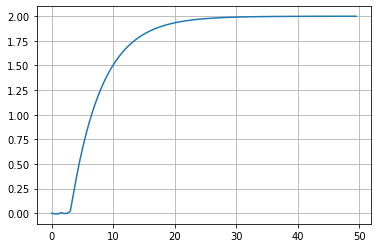

In [3]:
# Response
tsim = 50
dt = 0.5
t = np.arange(0, tsim, dt)
U = np.ones(len(t))

t1,C1 = ct.forced_response(G, t ,U)
plt.plot(t1,C1)
plt.grid()

Kp: 0.3125, Ti:5


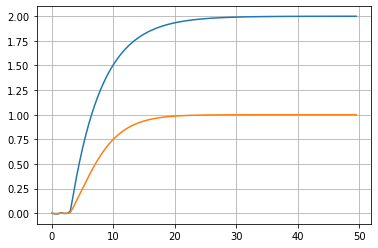

In [6]:
## Controller
l = 1*T

Kp = T/(K*(td+l))
Ti = T

num2 = [Kp*Ti, Kp]
den2 = [Ti, 0]
Gc = ct.tf(num2, den2)

print(f'Kp: {Kp}, Ti:{Ti}')

sys = ct.feedback(Gc*G)
t2, C2 = ct.forced_response(sys, t, U)
plt.plot(t1, C1, t2, C2)
plt.grid()